# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

In [2]:
df = pd.read_csv("./data/pima-data.csv")  # load Pima data. Adjust path as necessary

df.shape

(768, 10)

In [3]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [4]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1
767,1,93,70,31,0,30.4,0.315,23,1.2214,0


## Definition of features

### From the metadata on the data source we have the following definition of the features.

|Feature|Description|
|-----------|---------------|
|num_preg|number of pregnancies                                                       |
|glucose_conc|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|diastolic_bp|Diastolic blood pressure (mm Hg)                                        |
|thickness|Triceps skin fold thickness (mm)                                           |
|insulin|2-Hour serum insulin (mu U/ml)                                               |
|bmi|Body mass index (weight in kg/(height in m)^2)                                   |
|diab_pred|Diabetes pedigree function                                                 |
|Age (years)|Age (years)                                                              |
|skin|????, What is this?                                                              |
|diabetes|Class variable (1=True, 0=False), Why is our data boolean (True/False)?      |



## Check for null values

In [5]:
df.isnull().values.any()

False

### Correlation plot of *Data Frame*

In [6]:

def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

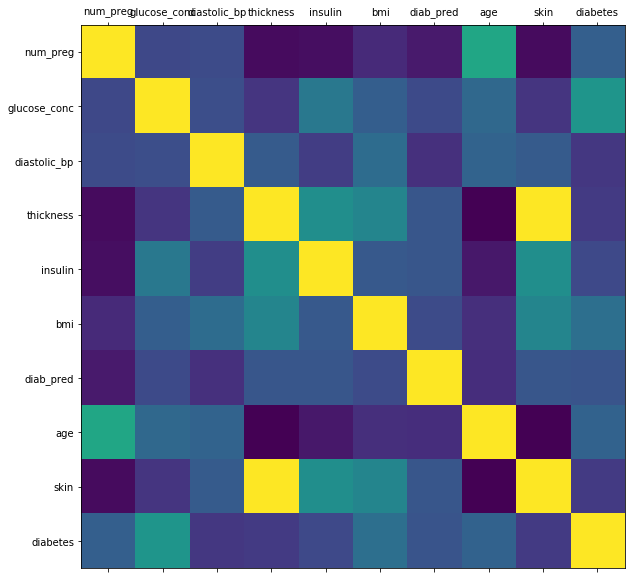

In [7]:
plot_corr(df)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


#### Skin and thickness columns are correlated 
##### removing 'skin' column

In [9]:
del df['skin']

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Change True to 1 and False to 0*

In [11]:
diabetes_map = {True : 1, False : 0}

In [12]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check True/False ratio

In [14]:
TrueCount = len(df.loc[df['diabetes'] == True])
FalseCount = len(df.loc[df['diabetes'] == False])

In [15]:
print("Number of true cases : {0} ({1:2.2f}%)".format(TrueCount, (TrueCount/(TrueCount+FalseCount))*100))
print("Number of false cases : {0} ({1:2.2f}%)".format(FalseCount, (FalseCount/(TrueCount+FalseCount))*100))

Number of true cases : 268 (34.90%)
Number of false cases : 500 (65.10%)


**Good distribution of true and false cases. No special work needed.**

## SPLITING THE DATA

*70% for Training, 30% for Testing*

In [16]:
from sklearn.cross_validation import train_test_split

featured_col_names = ['num_preg', 'glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_name = ['diabetes']

x = df[featured_col_names].values               # predictor feature columns (8 X m)
y = df[predicted_class_name].values             # predicted class (1 = true, 0 = false) column (1 X m)

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = split_test_size, random_state = 42)
        # test_size = 0.30 is 30%, 42 -> sets the seed for generating random numbers for the iterations in traing process



C:\Users\Sarfu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Check to ensure desired 70% train, 30% test split of data**

In [17]:
print("{0:0.2f}% in Training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in Test set".format((len(x_test)/len(df.index))*100))

69.92% in Training set
30.08% in Test set


**Verifying predicted value was split correctly**

In [18]:
Original_True_count = len(df.loc[df['diabetes']== 1])
Original_False_count = len(df.loc[df['diabetes']== 0])

print("Original True  : {0} ({1:0.2f}%)".format(Original_True_count, (Original_True_count/len(df.index)) *100))
print("Original False : {0} ({1:0.2f}%)".format(Original_False_count, (Original_False_count/len(df.index)) *100))

print("")
print("")

Training_True_count = len(y_train[y_train[:]== 1])
Training_False_count = len(y_train[y_train[:]== 0])
      
print("Original True  : {0} ({1:0.2f}%)".format(Training_True_count, (Training_True_count/len(y_train)) *100))
print("Original False : {0} ({1:0.2f}%)".format(Training_False_count, (Training_False_count/len(y_train)) *100))

print("")
print("")

Test_True_count = len(y_test[y_test[:]== 1])
Test_False_count = len(y_test[y_test[:]== 0])
      
print("Test True  : {0} ({1:0.2f}%)".format(Test_True_count, (Test_True_count/len(y_test)) *100))
print("Test False : {0} ({1:0.2f}%)".format(Test_False_count, (Test_False_count/len(y_test)) *100))
      

Original True  : 268 (34.90%)
Original False : 500 (65.10%)


Original True  : 188 (35.01%)
Original False : 349 (64.99%)


Test True  : 80 (34.63%)
Test False : 151 (65.37%)


### Post Split Data Preparation 

**Hidden Missing Values Problem and Solution**

In [19]:
df.head(5) # df['thickness'][0] has value zero (0)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
print("# rows in dataframe : {0}".format(len(df)))
print("# rows missing glucose_conc : {0}".format(len(df.loc[df['glucose_conc']==0])))
print("# rows missing diastolic_bp : {0}".format(len(df.loc[df['diastolic_bp']==0])))
print("# rows missing thickness : {0}".format(len(df.loc[df['thickness']==0])))
print("# rows missing insulin : {0}".format(len(df.loc[df['insulin']==0])))
print("# rows missing bmi : {0}".format(len(df.loc[df['bmi']==0])))
print("# rows missing diab_pred : {0}".format(len(df.loc[df['diab_pred']==0])))
print("# rows missing age : {0}".format(len(df.loc[df['age']==0])))

# rows in dataframe : 768
# rows missing glucose_conc : 5
# rows missing diastolic_bp : 35
# rows missing thickness : 227
# rows missing insulin : 374
# rows missing bmi : 11
# rows missing diab_pred : 0
# rows missing age : 0


**Impute missing values with the *mean* value**

In [21]:
from sklearn.preprocessing import Imputer

# Impute with mean all zero(0) readings
fill_0 = Imputer(missing_values = 0, strategy ="mean", axis = 0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initital Algorithm - Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on Training Data

In [23]:
# Predict values using training data
nb_predict_train = nb_model.predict(x_train)

# Import performance Metrics Library
from sklearn import metrics

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print("")


Accuracy 0.7542



In [24]:
# Predict values using test data
nb_predict_test = nb_model.predict(x_test)

# Import performance Metrics Library
from sklearn import metrics

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print("")

Accuracy 0.7359



### Metrics


In [25]:
print("Confusion Matrix")

# Note the use of labels for set 1 = true to upper left and set 0 = false to upper right
print ("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test,labels=[1,0]))
print("")

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231




# Random Forest Algorihtm 

In [26]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier(random_state=42) # Create Random Forest Object 
rf_model.fit(x_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training data

In [27]:
# Predict values using training data
rf_predict_train = rf_model.predict(x_train)

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print("")


Accuracy 0.9870



### Predict Test Data

In [28]:
# Predict values using test data
rf_predict_test = rf_model.predict(x_test)

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print("")

Accuracy 0.7100



### Metrics in case of Random Forest

In [29]:
print("Confusion Matrix")

# Note the use of labels for set 1 = true to upper left and set 0 = false to upper right
print ("{0}".format(metrics.confusion_matrix(y_test,rf_predict_test,labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,rf_predict_test,labels=[1,0]))
print("")

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231




# Logistic Regression Algorithm

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state = 42) # 'C' here is the Regularization Parameter 
lr_model.fit(x_train,y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict Test Data

In [31]:
# Predict values using training data
lr_predict_test = lr_model.predict(x_test)

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print("")



Accuracy 0.7446



### Metrics In case of Linear Regression

In [32]:
print("Confusion Matrix")

# Note the use of labels for set 1 = true to upper left and set 0 = false to upper right
print ("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))
print("")

Confusion Matrix
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231




#### Setting Regularization Parameter

1st max value of 0.613 occured at C=1.400


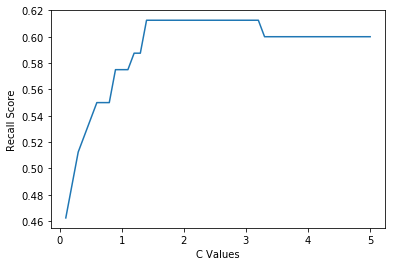

In [33]:
from sklearn.linear_model import LogisticRegression

c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [],[]

c_val = c_start
best_recall_score = 0
while (c_val < c_end):
    c_values.append(c_val)
    
    # Running Linear Regression Algorithm over training data
    lr_model_loop = LogisticRegression(C=c_val, random_state = 42) # 'C' being Regularization Parameter
    lr_model_loop.fit(x_train, y_train.ravel())
    
    # Running Linear Regression Model over test data
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    
    # Calculating recall_scores
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_lpredict_test = lr_predict_loop_test
    
    # Incrementing c_val
    c_val = c_val + c_inc

best_score_c_val =  c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_c_val))

%matplotlib inline
plt.plot(c_values,recall_scores,"-")
plt.xlabel("C Values")
plt.ylabel("Recall Score")

#### Logistic Regression (with Class_Weight = 'balanced')

1st max value of 0.738 occured at C=0.300


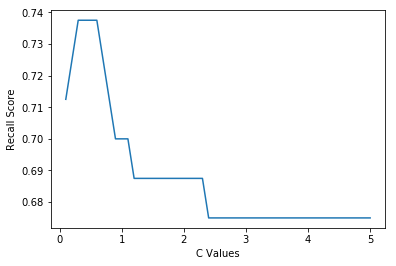

In [34]:
from sklearn.linear_model import LogisticRegression

c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [],[]

c_val = c_start
best_recall_score = 0
while (c_val < c_end):
    c_values.append(c_val)
    
    # Running Linear Regression Algorithm over training data
    lr_model_loop = LogisticRegression(C=c_val, class_weight='balanced', random_state = 42) # 'C' being Regularization Parameter
    lr_model_loop.fit(x_train, y_train.ravel())
    
    # Running Linear Regression Model over test data
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    
    # Calculating recall_scores
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_lpredict_test = lr_predict_loop_test
    
    # Incrementing c_val
    c_val = c_val + c_inc

best_score_c_val =  c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_c_val))

%matplotlib inline
plt.plot(c_values,recall_scores,"-")
plt.xlabel("C Values")
plt.ylabel("Recall Score")

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=best_score_c_val, class_weight='balanced', random_state = 42) 
lr_model.fit(x_train,y_train.ravel())
# Predict values using training data
lr_predict_test = lr_model.predict(x_test)

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print("")
print("Confusion Matrix")
# Note the use of labels for set 1 = true to upper left and set 0 = false to upper right
print ("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))
print("")

Accuracy 0.7143

Confusion Matrix
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231




# Logistic Regression Algorithm with Cross Validation 

In [36]:
from sklearn.linear_model import LogisticRegressionCV

# 'cv' - cross validation folds is set to 10
lr_cv_model = LogisticRegressionCV(n_jobs=-1,Cs=3,random_state=42,cv=10,class_weight='balanced',refit=True) 
lr_cv_model.fit(x_train,y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict On Test Data

In [37]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

#Accuracy
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print("")
print("Confusion Matrix")
# Note the use of labels for set 1 = true to upper left and set 0 = false to upper right
print ("{0}".format(metrics.confusion_matrix(y_test,lr_cv_predict_test,labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_cv_predict_test,labels=[1,0]))
print("")

Accuracy 0.7056

Confusion Matrix
[[ 54  26]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.68      0.61        80
          0       0.81      0.72      0.76       151

avg / total       0.72      0.71      0.71       231




The End :)